In [ ]:
from google.colab import files

# Subir archivo
uploaded = files.upload()

Saving WineQT.csv to WineQT (1).csv


In [ ]:
import pandas as pd

file_name = list(uploaded.keys())[0]

# Leer el archivo CSV
data = pd.read_csv(file_name)

# Mostrar las primeras filas del dataset
data.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
# Listar los archivos subidos
!ls


drive  sample_data  WineQT.csv


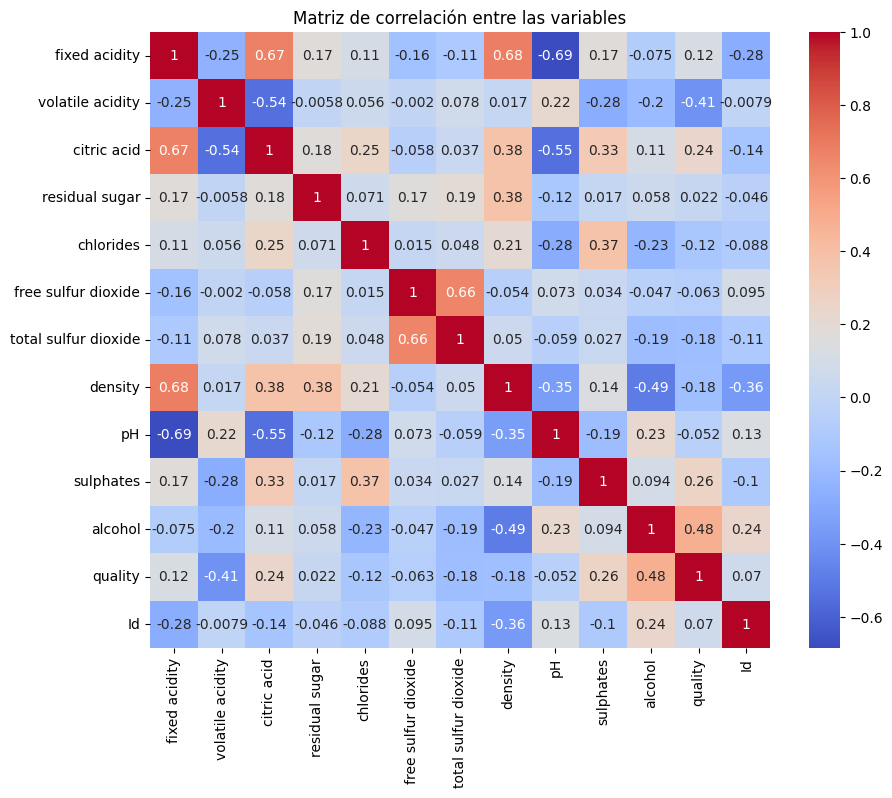

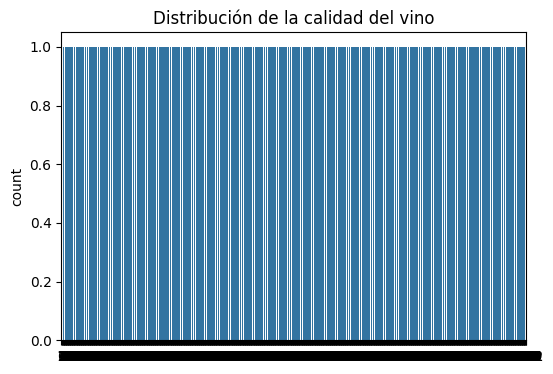

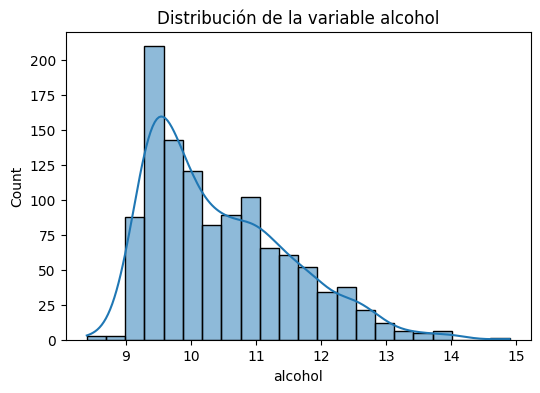

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre las variables')
plt.show()

# Distribución de la calidad
plt.figure(figsize=(6, 4))
sns.countplot(data['quality'])
plt.title('Distribución de la calidad del vino')
plt.show()

# Distribución de una variable (ejemplo: alcohol)
plt.figure(figsize=(6, 4))
sns.histplot(data['alcohol'], kde=True)
plt.title('Distribución de la variable alcohol')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar las variables predictoras (X)y  objetivo (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Convertir calidad en categorías
y_train_class = y_train.apply(lambda x: 0 if x <= 5 else (1 if x == 6 else 2))
y_test_class = y_test.apply(lambda x: 0 if x <= 5 else (1 if x == 6 else 2))

# Crear y entrenar el modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train_class)

# Hacer predicciones
y_pred_class = log_reg.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

print(f"Accuracy: {accuracy}")
print("Matriz de confusión:")
print(conf_matrix)


Accuracy: 0.6637554585152838
Matriz de confusión:
[[77 23  2]
 [30 60  9]
 [ 2 11 15]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo de Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train_class)

# Hacer predicciones
y_pred_rf = rf_clf.predict(X_test_scaled)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test_class, y_pred_rf)

print(f"Accuracy (Random Forest): {accuracy_rf}")


Accuracy (Random Forest): 0.6986899563318777


In [ ]:
from sklearn.svm import SVC

# Crear y entrenar el modelo de SVM
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train_scaled, y_train_class)

# Hacer predicciones
y_pred_svm = svm_clf.predict(X_test_scaled)

# Evaluar el modelo
accuracy_svm = accuracy_score(y_test_class, y_pred_svm)

print(f"Accuracy (SVM): {accuracy_svm}")


Accuracy (SVM): 0.6681222707423581
